<a href="https://colab.research.google.com/github/junanote/test_deeplearning/blob/master/boston_housingwithregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data


# Dataset


In [12]:
(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz', test_split=0.2, seed=113)
x_train.shape, y_train.shape, x_test.shape, y_test.shape, type(x_train)


((404, 13), (404,), (102, 13), (102,), numpy.ndarray)

In [5]:
type(x_train)

numpy.ndarray

In [37]:
import pandas as pd 


In [39]:
df = pd.DataFrame(x_train)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [41]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_test)


StandardScaler(copy=True, with_mean=True, with_std=True)

# model and fit


In [64]:
model = tf.keras.models.Sequential()

In [65]:

model.add(tf.keras.Input(shape=(13)))  # input layer
model.add(tf.keras.layers.Dense(64, activation='sigmoid'))# 기능 layer
model.add(tf.keras.layers.Dense(64, activation='sigmoid')) # hidden layer
model.add(tf.keras.layers.Dense(64, activation='sigmoid')) # hidden layer 
model.add(tf.keras.layers.Dense(1,))
model.compile(optimizer='sgd',loss='mse', metrics=['mae'])




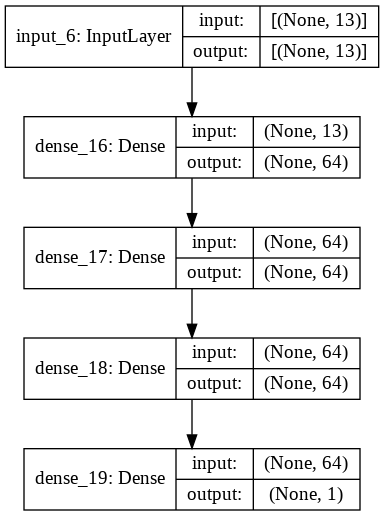

In [66]:
tf.keras.utils.plot_model(model, show_shapes=True)


In [67]:
model.summary()



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 65        
Total params: 9,281
Trainable params: 9,281
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.fit(x_test, y_test, epochs=100)


Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 311.6794 - mae: 14.4900
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 86.7419 - mae: 6.8684
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 83.8982 - mae: 6.5240
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 81.6356 - mae: 6.5288
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 81.6352 - mae: 6.4497
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 86.6494 - mae: 6.6646
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 84.9436 - mae: 6.6435
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 90.2074 - mae: 7.0527
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 80.9634 - mae: 6.9077
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 84.1138 - mae: 6.4980
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - l

# evaluation


In [59]:
model.evaluate(x_train,y_train)

ValueError: ignored

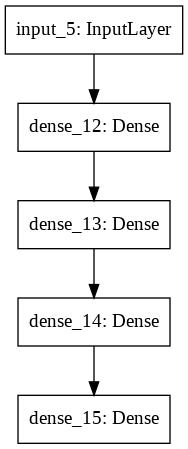

In [55]:
tf.keras.utils.plot_model(model)

# service


In [61]:
x_test[10]

array([2.2876e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01,
       6.4050e+00, 8.5400e+01, 2.7147e+00, 5.0000e+00, 3.8400e+02,
       2.0900e+01, 7.0800e+01, 1.0630e+01])

In [62]:
y_test

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])